In [9]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')


#### **Loadindg Dataset**

In [3]:
#creating connection
conn = sqlite3.connect('inventory.db')

In [11]:
df = pd.read_sql_query("select * from vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,...,TotalSalesPrice,TotalExciseTax,FreightCost,Gross Profit,Profit Margin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,...,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,large,79624.37
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,...,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,large,87913.29
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,...,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,large,4870.08
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,...,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,large,20535.90
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,...,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,large,49712.19


### **Exploratory Data Analysis**

- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.


In [12]:
#statistics summary 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8566.0,1.010616e+04,17633.844417,2.000000e+00,3664.000000,7153.000000,9552.000000,2.013590e+05
Brand,8566.0,1.761224e+04,12945.824030,5.800000e+01,5375.250000,17598.500000,24934.750000,9.063100e+04
PurchasePrice,8566.0,2.177682e+01,81.180609,0.000000e+00,6.660000,10.060000,17.842500,3.352930e+03
Actual_Price,8566.0,3.229144e+01,112.408353,0.000000e+00,9.990000,14.990000,25.990000,4.559990e+03
volume,8566.0,8.643931e+02,724.189140,5.000000e+01,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,8566.0,3.771366e+03,12275.608628,1.000000e+00,42.000000,431.000000,2665.250000,3.376600e+05
TotalPurchaseDollars,8566.0,3.587890e+04,136708.128544,0.000000e+00,545.422500,5011.660000,26597.997500,3.811252e+06
TotalSalesQuantity,8566.0,3.748312e+03,12124.366939,1.000000e+00,62.000000,490.500000,2674.750000,3.349390e+05
TotalSalesDollars,8566.0,5.154174e+04,186051.275079,1.980000e+00,1351.760000,8483.780000,40640.237500,5.101920e+06
TotalSalesPrice,8566.0,2.276104e+04,49301.813941,9.900000e-01,584.670000,4549.755000,22595.517500,6.728193e+05


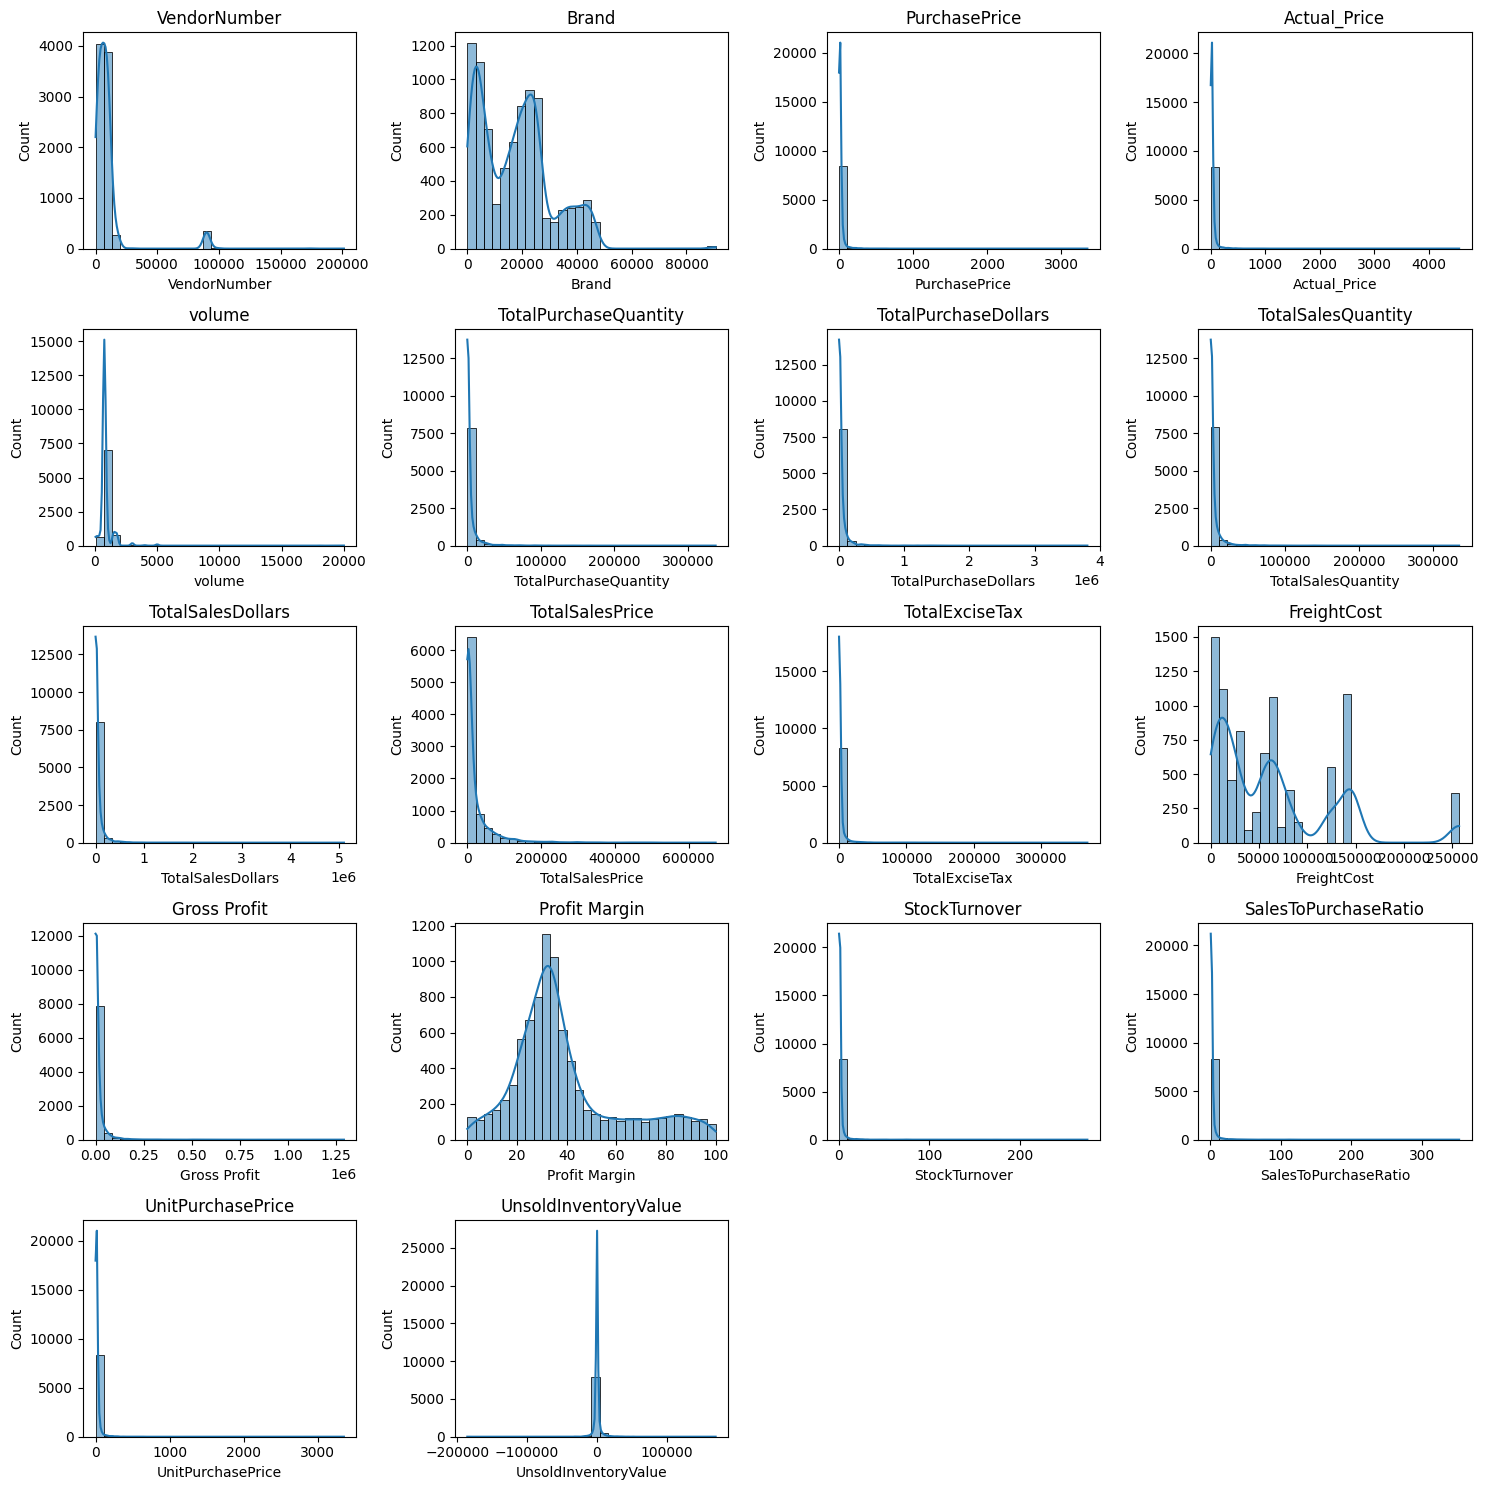

In [14]:
import math

numerical_cols = df.select_dtypes(np.number).columns
n_cols = 4
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(15, n_rows * 3))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


### **📊 Summary Statistics Insights**
❌ **Negative & Zero Values**

Gross Profit
Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or heavy discounting below purchase price.

Profit Margin
Has a minimum of -∞, suggesting cases where revenue is zero or even lower than costs.

Total Sales Quantity & Sales Dollars
Minimum values are 0, meaning some products were purchased but never sold. These could represent slow-moving or obsolete stock.

🚨 **Outliers Indicated by High Standard Deviations**

Purchase Price & Actual Price
Maximum values (5,681.81 and 7,499.99) are significantly higher than the means (24.39 and 35.64), indicating the presence of premium or high-value products.

Freight Cost
Shows extreme variation, ranging from 0.09 to 257,032.07, which suggests logistics inefficiencies or bulk shipment effects.

Stock Turnover
Ranges from 0 to 274.5, implying that some products sell extremely fast while others remain in inventory indefinitely.
A value greater than 1 indicates sold quantity exceeded purchased quantity, likely due to sales fulfilled from older stock.

In [6]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,Gross Profit,Profit Margin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388
10691,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50.0,1,0.71,86.0,8.514000e+01,33.66,4.46,38994.78,84.43,99.166079,86.000000,119.915493


In [9]:
####Lets filter data by removing incosistencies 
df = pd.read_sql_query("""
    select * from vendor_sales_summary 
    where "Gross Profit" >0 
    and "Profit Margin" >0 and 
    TotalSalesQuantity	> 0""",conn)


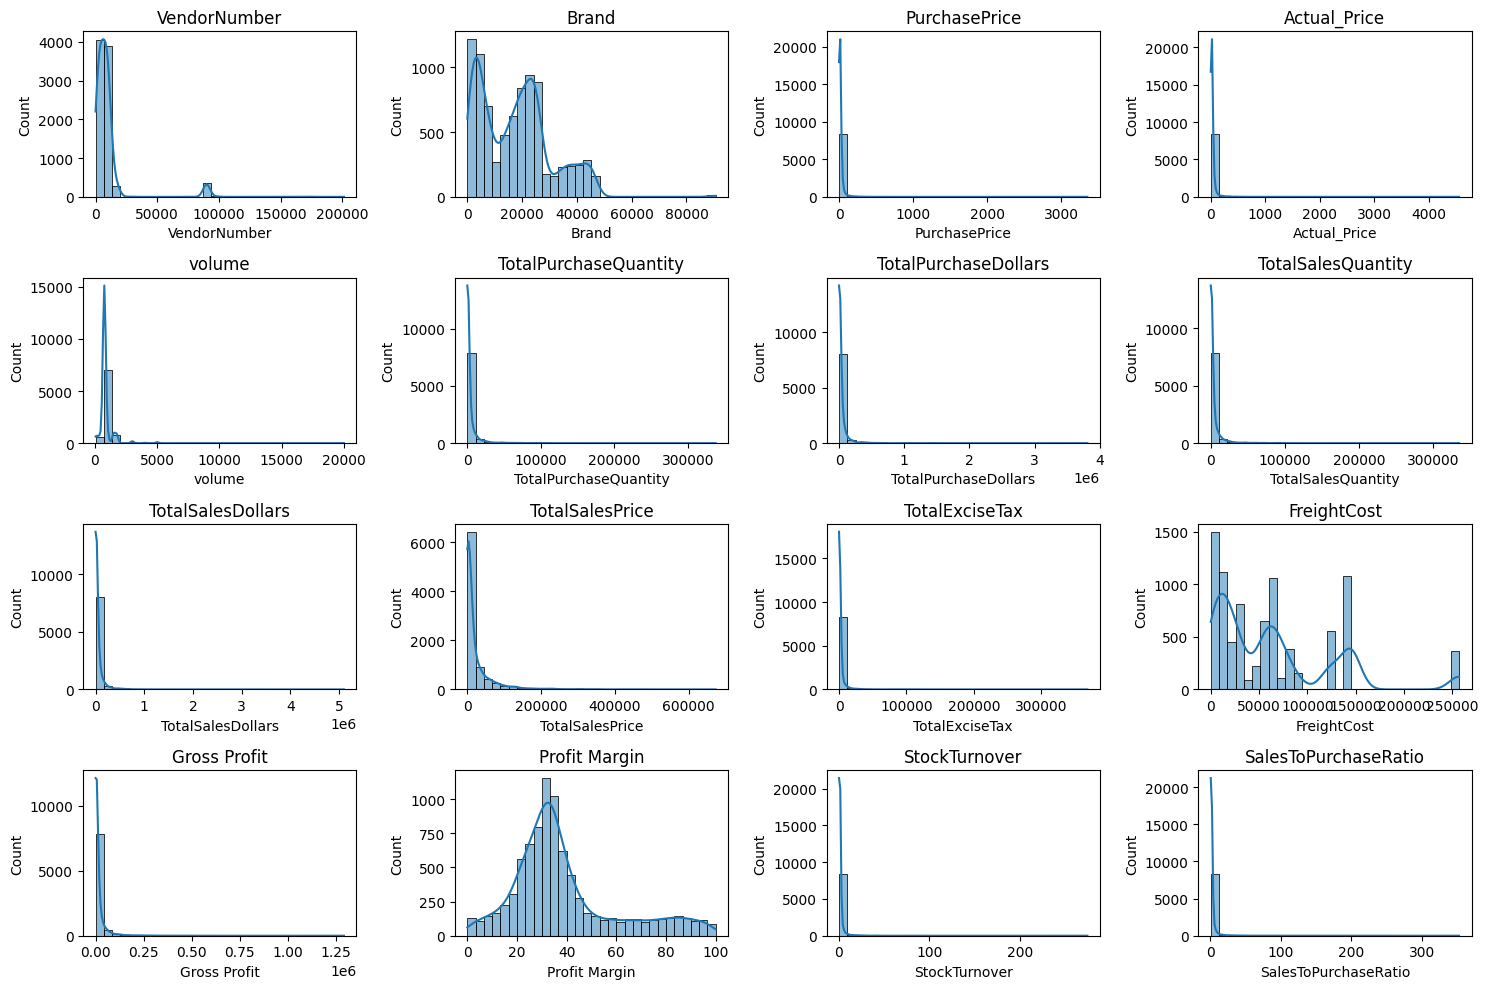

In [10]:
numerical_cols = df.select_dtypes(np.number).columns
plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show()

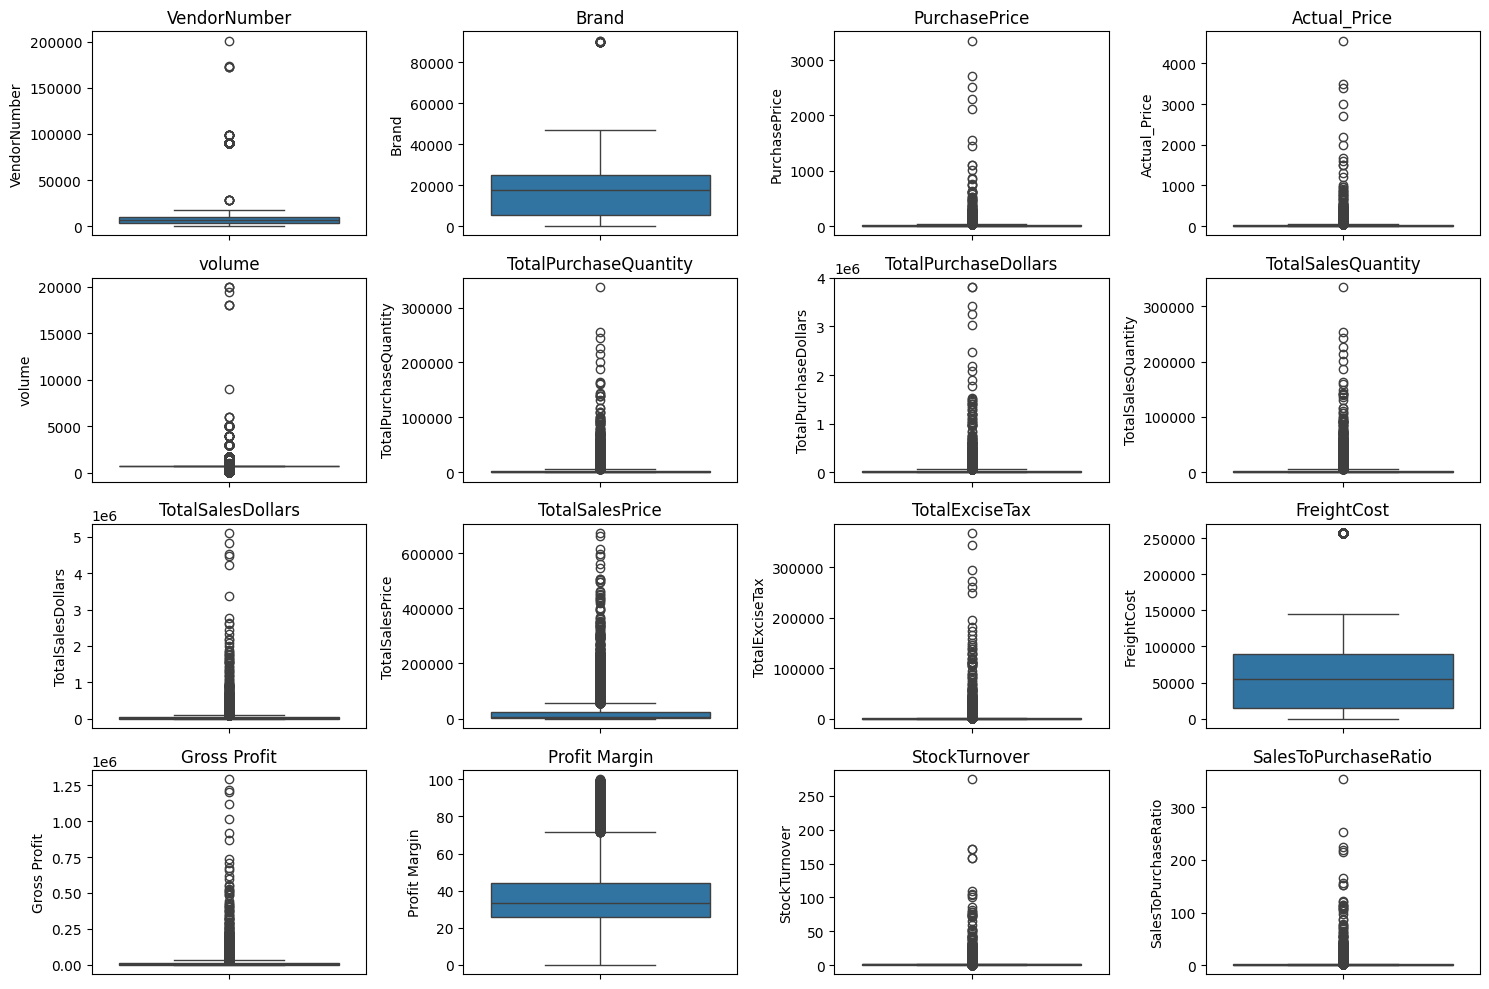

In [11]:
numerical_cols = df.select_dtypes(np.number).columns
plt.figure(figsize = (15,10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### **Summary Statistics Insights**

#### Negative & Zero Values

- **Gross Profit:** Minimum value is **-52,002.78**, indicating losses. Some products or transactions may be selling at a loss due to high costs or heavy discounts below the purchase price.

- **Profit Margin:** Has a minimum of **-∞**, which suggests cases where revenue is zero or even lower than costs.

- **Total Sales Quantity & Sales Dollars:** Minimum values are **0**, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

#### Outliers Indicated by High Standard Deviations

- **Purchase & Actual Prices:** The maximum values (**5,681.81** and **7,499.99**) are significantly higher than the means (**24.39** and **35.64**), indicating potential premium or high-value products.

- **Freight Cost:** Shows huge variation, ranging from **0.09** to **257,032.07**, suggesting logistics inefficiencies, bulk shipments, or exceptional transport cases.

- **Stock Turnover:** Ranges from **0** to **274.5**, implying that some products sell extremely fast while others remain in stock indefinitely.  
  A value greater than **1** indicates that sold quantity exceeds purchased quantity, likely due to sales being fulfilled from older inventory.


In [12]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,Gross Profit,Profit Margin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388
8564,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50.0,1,0.71,86.0,8.514000e+01,33.66,4.46,38994.78,84.43,99.166079,86.000000,119.915493


#### **VenderName & Product with highest number of record**

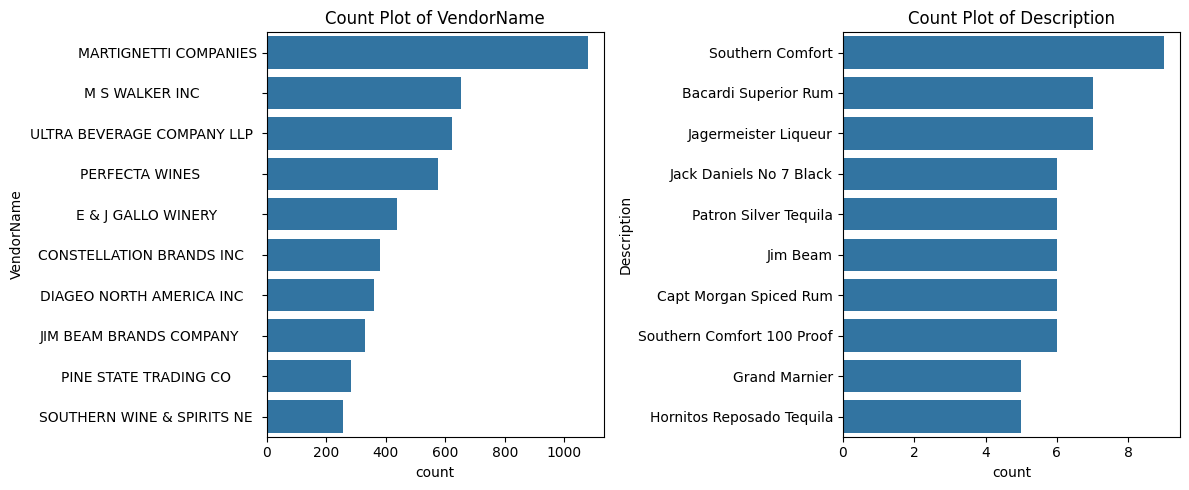

In [16]:
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize = (12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2, i+1)
    sns.countplot(y = df[col], order = df[col].value_counts().index[:10]) #top 10 categories)
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

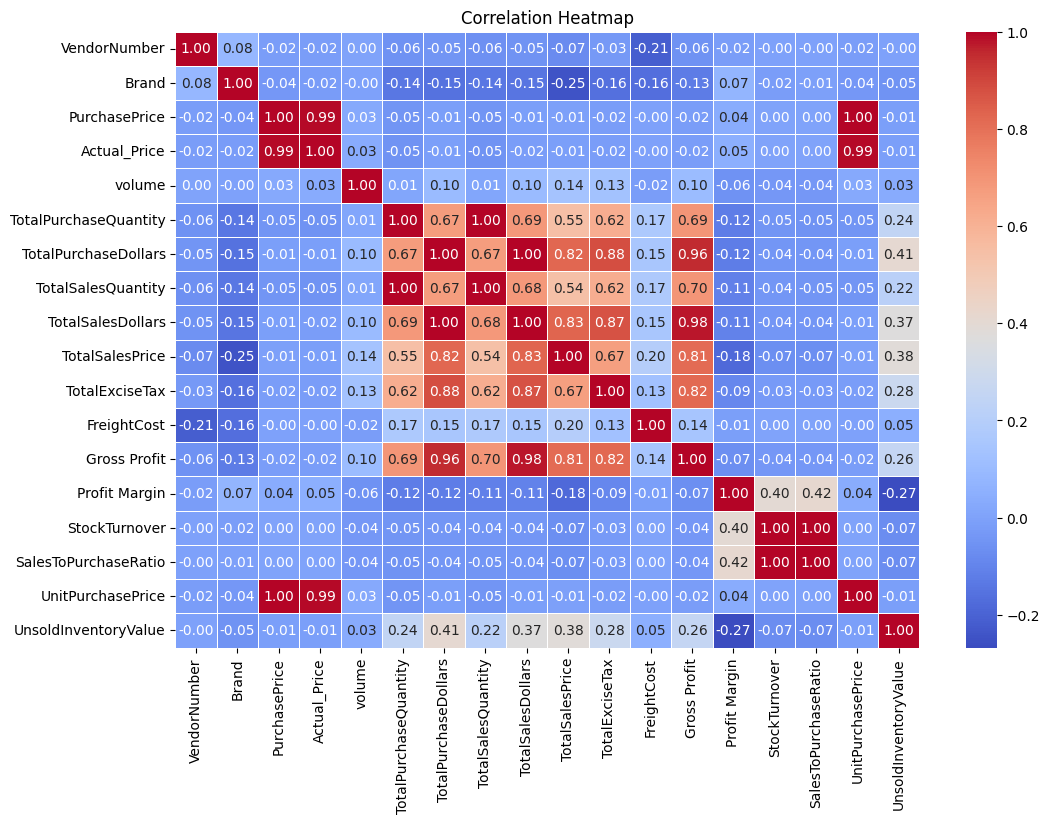

In [17]:
#Co-relation Heatmap 
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", linewidth = 0.5)
plt.title("Correlation Heatmap")
plt.show()
          

## Correlation Insights

- **Purchase Price** shows weak correlations with **Total Sales Dollars** (-0.012) and **Gross Profit** (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.

- A **strong positive correlation** exists between **Total Purchase Quantity** and **Total Sales Quantity** (0.999), confirming efficient inventory turnover.

- **Profit Margin** has a **negative correlation** with **Total Sales Price** (-0.179), indicating that as sales price increases, margins tend to decrease—possibly due to competitive pricing pressures.

- **Stock Turnover** exhibits weak negative correlations with **Gross Profit** (-0.038) and **Profit Margin** (-0.055), implying that faster inventory turnover does not necessarily lead to higher profitability.


### **Data Analysis**

#### Identify brands that needs promotional or pricing adjustments which exhibit lower sales performance but higher profit margines

In [35]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Actual_Price', 'volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'Gross Profit',
       'Profit Margin', 'StockTurnover', 'SalesToPurchaseRatio'],
      dtype='object')

In [18]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'Profit Margin':'mean'
}).reset_index()

In [19]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['Profit Margin'].quantile(0.85)

In [20]:
low_sales_threshold

560.357

In [21]:
high_margin_threshold

65.03587868318031

### **Q1. Target brands which needs promotion or pricing adjustments**

In [22]:
#Filter brands with low sales but high profit margins 
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) & 
    (brand_performance['Profit Margin'] >=high_margin_threshold)
]
print("brands with low sales but high profit Margins: ")
display(target_brands.sort_values('TotalSalesDollars'))


brands with low sales but high profit Margins: 


,Description,TotalSalesDollars,Profit Margin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


### **Q2 Which top 10 vendors & Brands demonstrate highest sales performance** 

In [23]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors
                         

VendorName
DIAGEO NORTH AMERICA INC       6.799010e+07
MARTIGNETTI COMPANIES          3.927640e+07
PERNOD RICARD USA              3.206320e+07
JIM BEAM BRANDS COMPANY        3.142302e+07
BACARDI USA INC                2.485482e+07
CONSTELLATION BRANDS INC       2.421875e+07
E & J GALLO WINERY             1.839990e+07
BROWN-FORMAN CORP              1.824723e+07
ULTRA BEVERAGE COMPANY LLP     1.650254e+07
M S WALKER INC                 1.470646e+07
Name: TotalSalesDollars, dtype: float64

In [20]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [24]:
vendor_performance = df.groupby("VendorName").agg(
    {
        "TotalPurchaseDollars":'sum',
        'Gross Profit':'sum',
        'TotalSalesDollars':'sum'
    }
)
vendor_performance.reset_index()

,VendorName,TotalPurchaseDollars,Gross Profit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
115,WEIN BAUER INC,42694.64,13522.49,56217.13
116,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
117,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
118,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [25]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [26]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending = False),2)

In [27]:
#Display top 10 vendors 
top_vendors  = vendor_performance.head(10)
top_vendors

,TotalPurchaseDollars,Gross Profit,TotalSalesDollars,PurchaseContribution%
VendorName,,,,
DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
MARTIGNETTI COMPANIES,25464774.04,13811624.76,39276398.80,8.29
PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
CONSTELLATION BRANDS INC,15273708.08,8945037.57,24218745.65,4.97
BROWN-FORMAN CORP,13238939.18,5008291.47,18247230.65,4.31
E & J GALLO WINERY,12068539.22,6331360.24,18399899.46,3.93
ULTRA BEVERAGE COMPANY LLP,11167081.61,5335462.70,16502544.31,3.63


In [28]:
vendor_performance.shape

(120, 4)

In [29]:
top_vendors['PurchaseContribution%'].sum()

65.68

### **Insight**

from 120 vendors, only top 10 vendors contribute more than 65% of total purchase

### **Q3 How much of total procurement is dependent on top vendors**

In [30]:
print(f"Total procurement of top vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total procurement of top vendors is 65.68%


#### **Q4. Does purchasing in bulk reduce the unit price & What is the optimal purchase volume for cost saving**

In [31]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,...,TotalSalesPrice,TotalExciseTax,FreightCost,Gross Profit,Profit Margin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,...,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,large,79624.37
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,...,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,large,87913.29
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,...,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,large,4870.08
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,...,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,large,20535.90
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,...,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,large,49712.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,...,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39,Small,-49.92
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,...,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74,Small,0.00
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,...,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47,Small,-104.37
8564,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50.0,1,0.71,86.0,...,33.66,4.46,38994.78,84.43,99.166079,86.000000,119.915493,0.71,Small,-60.35


In [32]:
#creating buckets on the basis of order size
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels = ["Small", "medium", "large"])
df[['OrderSize', 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,large,145080
1,large,164038
2,large,187407
3,large,201682
4,large,138109
...,...,...
8561,Small,6
8562,Small,2
8563,Small,1
8564,Small,1


In [33]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.057543
medium,15.482067
large,10.774898


#### **Insights**
- **Vendors buying in bulk (Large Order Size)** get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
- The price difference between **Small and Large orders** is substantial (~72% reduction in unit cost).
- This suggests that **bulk pricing strategies** successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.


#### **Q5.which vendor hve slow inventory turnover, indicating access stock & slow moving products**

In [34]:
df[df['StockTurnover']<1]

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,...,TotalSalesPrice,TotalExciseTax,FreightCost,Gross Profit,Profit Margin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,...,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,large,79624.37
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,...,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,large,87913.29
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,...,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,large,4870.08
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,...,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,large,20535.90
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,...,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,large,49712.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8202,9552,M S WALKER INC,398,S S Pierce Ninety Nine Gin,5.63,7.49,1000.0,11,61.93,9.0,...,7.49,9.45,55551.82,5.48,8.129358,0.818182,1.088487,5.63,Small,11.26
8203,1392,CONSTELLATION BRANDS INC,16916,R Mondavi Malbec Private Slt,5.15,7.99,750.0,12,61.80,10.0,...,34.96,1.12,79528.99,24.10,28.055879,0.833333,1.389968,5.15,Small,10.30
8243,8352,LUXCO INC,8629,Ezra Brooks Cinnamon Bourbon,11.02,13.99,1750.0,5,55.10,3.0,...,37.98,5.51,10261.60,1.87,3.282429,0.600000,1.033938,11.02,Small,22.04
8299,4425,MARTIGNETTI COMPANIES,11653,Mas Belles Eaux Les Cot Roug,6.57,9.99,750.0,7,45.99,3.0,...,16.99,0.34,144929.24,4.98,9.770453,0.428571,1.108284,6.57,Small,26.28


In [46]:
#Top 10 low inventory vendors
df[df['StockTurnover']<1].groupby("VendorName")[['StockTurnover']].mean().sort_values('StockTurnover',ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


### **Q6.How much capital is locked in unsold inventory per vendor & which vendor contribute the most of it**

In [48]:
def format_dollars(x):
    return f"${x:,.2f}"


In [49]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity']-df['TotalSalesQuantity'])*df['PurchasePrice']
print('TotalUnsoldCapital:', format_dollars(df['UnsoldInventoryValue'].sum()))

TotalUnsoldCapital: $2,708,246.50


In [52]:
#Aggregate capital Locked per vendor 
inventory_value_per_vender = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()
inventory_value_per_vender

,VendorName,UnsoldInventoryValue
0,ADAMBA IMPORTS INTL INC,-91.52
1,ALISA CARR BEVERAGES,-43151.48
2,ALTAMAR BRANDS LLC,464.23
3,AMERICAN SPIRITS EXCHANGE,116.76
4,AMERICAN VINTAGE BEVERAGE,3672.17
...,...,...
115,WEIN BAUER INC,1732.03
116,WESTERN SPIRITS BEVERAGE CO,-949.61
117,WILLIAM GRANT & SONS INC,401960.83
118,WINE GROUP INC,86862.57


In [57]:
#sort vendors with highest locked capitals 
inventory_value_per_vender = inventory_value_per_vender.sort_values(by ='UnsoldInventoryValue', ascending= False)
inventory_value_per_vender['UnsoldInventoryValue'] = inventory_value_per_vender['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vender.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,"$722,209.05"
46,JIM BEAM BRANDS COMPANY,"$554,665.63"
69,PERNOD RICARD USA,"$470,625.61"
117,WILLIAM GRANT & SONS INC,"$401,960.83"
30,E & J GALLO WINERY,"$228,282.61"
80,SAZERAC CO INC,"$198,436.41"
11,BROWN-FORMAN CORP,"$177,733.74"
20,CONSTELLATION BRANDS INC,"$133,617.62"
62,MOET HENNESSY USA INC,"$126,477.70"
78,REMY COINTREAU USA INC,"$118,598.15"


In [58]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,...,TotalSalesPrice,TotalExciseTax,FreightCost,Gross Profit,Profit Margin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,...,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,large,79624.37
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,...,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,large,87913.29
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,...,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,large,4870.08
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,...,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,large,20535.90
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,...,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,large,49712.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,...,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39,Small,-49.92
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,...,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74,Small,0.00
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,...,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47,Small,-104.37
8564,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50.0,1,0.71,86.0,...,33.66,4.46,38994.78,84.43,99.166079,86.000000,119.915493,0.71,Small,-60.35


In [35]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Actual_Price', 'volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'Gross Profit',
       'Profit Margin', 'StockTurnover', 'SalesToPurchaseRatio',
       'UnitPurchasePrice', 'OrderSize', 'UnsoldInventoryValue'],
      dtype='object')

In [36]:
df.to_sql("vendor_sales_summary",
         con=conn,
          if_exists="replace",
          index=False
         )

8566

In [40]:
df.to_sql("vendor_sales_summary",
          con = conn,
          if_exists = "replace",
          index=False
         )

8566

In [37]:
pd.read_sql_query("""
    select * from vendor_sales_summary""",conn)


,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,...,TotalSalesPrice,TotalExciseTax,FreightCost,Gross Profit,Profit Margin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,...,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,large,79624.37
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,...,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,large,87913.29
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,...,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,large,4870.08
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,...,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,large,20535.90
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,...,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,large,49712.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,...,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39,Small,-49.92
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,...,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74,Small,0.00
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,...,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47,Small,-104.37
8564,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50.0,1,0.71,86.0,...,33.66,4.46,38994.78,84.43,99.166079,86.000000,119.915493,0.71,Small,-60.35


In [38]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,...,TotalSalesPrice,TotalExciseTax,FreightCost,Gross Profit,Profit Margin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,...,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,large,79624.37
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,...,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,large,87913.29
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,...,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,large,4870.08
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,...,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,large,20535.90
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,...,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,large,49712.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,...,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39,Small,-49.92
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,...,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74,Small,0.00
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,...,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47,Small,-104.37
8564,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50.0,1,0.71,86.0,...,33.66,4.46,38994.78,84.43,99.166079,86.000000,119.915493,0.71,Small,-60.35
